In [ ]:
# dataset link
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('creditcard.csv')

In [7]:
df.shape

(284807, 31)

In [8]:
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
131007,79480.0,-1.727559,-0.458775,1.715774,-2.435778,-1.417090,-0.169017,-0.869109,0.535040,-2.480268,...,0.053726,0.492974,-0.475038,0.246724,0.238316,-0.193586,0.115311,-0.142006,78.00,0
18533,29575.0,1.113236,-0.062593,1.363699,1.362644,-1.183401,-0.491999,-0.554501,0.075150,0.823649,...,0.017020,0.136785,0.030647,0.703729,0.322292,-0.420157,0.063216,0.043533,21.95,0
66267,51965.0,-1.449165,1.306168,1.469564,-0.535523,0.358597,-0.727022,0.045342,-2.626234,0.008087,...,1.974268,-1.570003,0.092139,0.266569,-0.080042,-0.064088,0.033342,-0.123977,1.98,0
214342,139633.0,1.444392,-2.085862,-1.127830,-0.693332,-1.136195,-0.187497,-0.429037,-0.138353,-0.351957,...,0.476146,0.620098,-0.203379,-0.406569,-0.276640,-0.208175,-0.064645,0.000420,377.00,0
278129,168051.0,-0.111495,-0.300267,0.505886,0.552223,-1.034117,-0.157787,-0.815161,0.399921,-1.275166,...,-0.233407,-0.366942,0.737564,1.152133,-2.225299,0.429122,0.223256,0.197919,73.06,0
96949,66017.0,1.167565,-0.037342,0.947829,1.608697,-0.804830,-0.207559,-0.366715,0.082293,1.000721,...,-0.124316,-0.052174,-0.087221,0.398486,0.659975,-0.284752,0.051796,0.023742,5.00,0
242294,151427.0,-0.706978,1.545950,-0.582948,-0.897094,2.337918,-1.184154,1.982799,-0.446375,-1.219163,...,-0.055207,0.000868,-0.747446,0.602151,1.223123,0.667662,-0.241179,-0.146598,0.76,0
183423,125791.0,1.813134,-0.507789,-1.639519,0.151276,0.305866,-0.204291,0.190692,-0.040421,0.523049,...,-0.161309,-0.739418,0.187482,0.157892,-0.188932,-0.634070,-0.049942,-0.038412,123.19,0
277190,167512.0,2.149876,-0.769941,-1.274667,-1.032966,-0.264809,0.198505,-1.064106,0.170910,-0.178063,...,-0.108126,-0.363001,0.294838,-0.249573,-0.422548,-0.484494,0.019393,-0.023578,17.33,0
214991,139893.0,1.717206,-0.332094,-2.115101,0.065897,1.165756,1.234988,-0.119851,0.360932,0.632892,...,-0.088014,-0.095770,0.163880,-0.831266,-0.254428,-0.029903,0.028669,-0.020355,93.82,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
df.isnull().sum().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


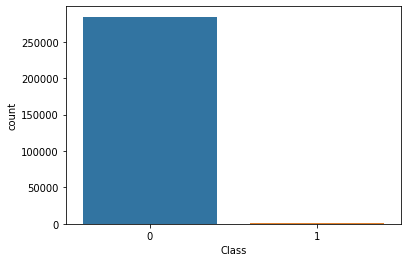

In [13]:
sns.countplot(df['Class'])

In [15]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [18]:
df.duplicated().sum()

1081

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
fraud=df[df['Class']==1]
right=df[df['Class']==0]

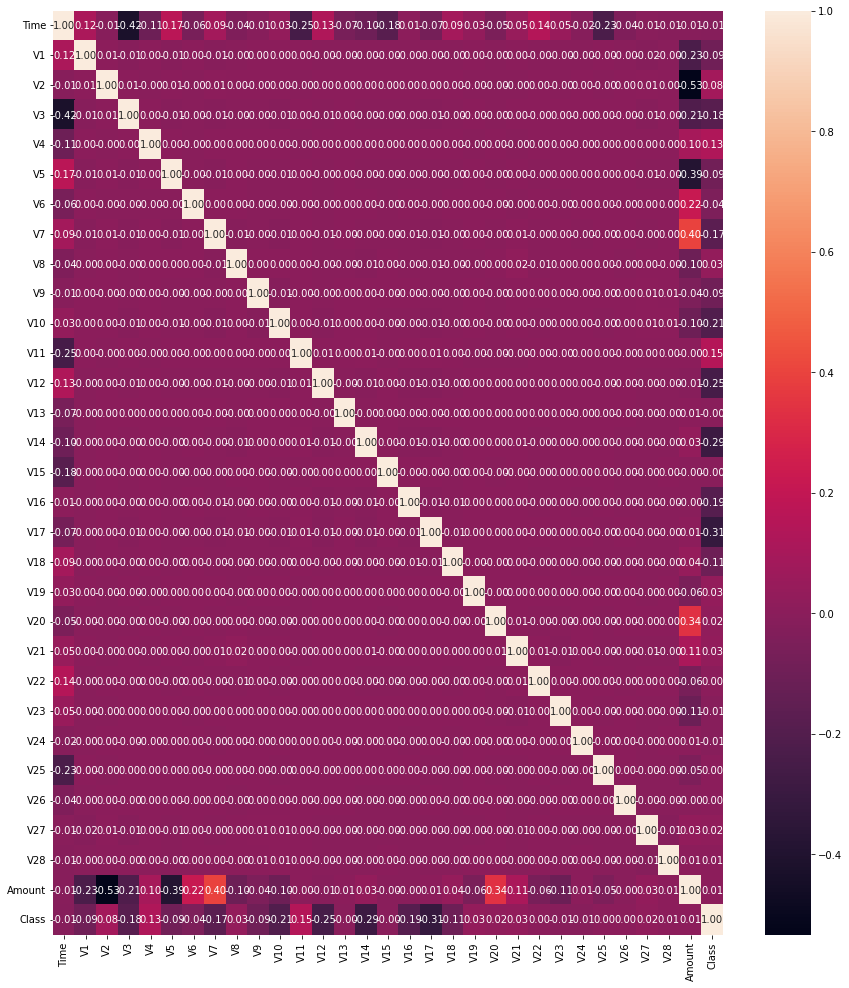

In [27]:
plt.figure(figsize=(15,17))
sns.heatmap(df.corr(),annot=True,fmt=".2f")

In [31]:
pd.set_option("display.max_columns",None)
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,0.007663,-0.006004,0.009476,0.000762,0.011668,0.001166,0.007845,0.010963,0.005120,-0.001382,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,3.716347,-6.103254,-0.094324,-6.835946,-0.072830,-4.000956,-6.463285,-2.157071,0.669143,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [32]:
fraud.shape

(473, 31)

In [33]:
# The undersampling technique has been used for this project!!!!!

right_sample=right.sample(n=473)

In [34]:
dataset=pd.concat([right_sample,fraud],axis=0)

In [35]:
df.groupby('Class').mean()
# This comparison shows that the nature of data statistically has not changed much

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,0.007663,-0.006004,0.009476,0.000762,0.011668,0.001166,0.007845,0.010963,0.005120,-0.001382,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,3.716347,-6.103254,-0.094324,-6.835946,-0.072830,-4.000956,-6.463285,-2.157071,0.669143,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [36]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [38]:
print(X)
print(y)

            Time        V1        V2        V3        V4        V5        V6  \
37417    38947.0  0.432013 -2.358981  0.636108 -0.020604 -1.957049  0.273292   
63150    50586.0  1.387689 -0.440143 -0.118528 -0.707962 -0.809567 -1.234038   
260728  159696.0  0.105304  1.096022 -0.261833 -0.717320  1.363279 -0.645236   
217086  140756.0 -0.916430 -0.587475 -1.487652  0.931749  0.936994 -0.532449   
215637  140155.0  2.039107 -0.167212 -1.225959  0.205371  0.080907 -0.591934   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9   

In [42]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [49]:
from sklearn.linear_model import LogisticRegression
lrc= LogisticRegression()

from sklearn import svm
svcl = svm.SVC()

from sklearn.neighbors import KNeighborsClassifier
knc= KNeighborsClassifier()

from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()

from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100)

from sklearn.metrics import accuracy_score

In [50]:
# Prediction on the training data

y_pred_lrc_train = lrc.fit(X_train,y_train).predict(X_train)

y_pred_svcl_train = svcl.fit(X_train,y_train).predict(X_train)

y_pred_knc_train = knc.fit(X_train,y_train).predict(X_train)

y_pred_gnb_train = gnb.fit(X_train,y_train).predict(X_train)

y_pred_rfc_train = rfc.fit(X_train,y_train).predict(X_train)



# Prediction on the testing data

y_pred_lrc_test = lrc.fit(X_train,y_train).predict(X_test)

y_pred_svcl_test = svcl.fit(X_train,y_train).predict(X_test)

y_pred_knc_test = knc.fit(X_train,y_train).predict(X_test)

y_pred_gnb_test = gnb.fit(X_train,y_train).predict(X_test)

y_pred_rfc_test = rfc.fit(X_train,y_train).predict(X_test)

# Accuracy score
print('Logistic Regression')
print('Training acc score',accuracy_score(y_train,y_pred_lrc_train))
print('Testing acc score',accuracy_score(y_test,y_pred_lrc_test))

print('SVM')
print('Training acc score',accuracy_score(y_train,y_pred_svcl_train))
print('Testing acc score',accuracy_score(y_test,y_pred_svcl_test))

print('KNN')
print('Training acc score',accuracy_score(y_train,y_pred_knc_train))
print('Testing acc score',accuracy_score(y_test,y_pred_knc_test))

print('GNB')
print('Training acc score',accuracy_score(y_train,y_pred_gnb_train))
print('Testing acc score',accuracy_score(y_test,y_pred_gnb_test))

print('Random Forest')
print('Training acc score',accuracy_score(y_train,y_pred_lrc_train))
print('Testing acc score',accuracy_score(y_test,y_pred_rfc_test))



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic Regression
Training acc score 0.9391534391534392
Testing acc score 0.9315789473684211
SVM
Training acc score 0.5873015873015873
Testing acc score 0.5631578947368421
KNN
Training acc score 0.746031746031746
Testing acc score 0.6105263157894737
GNB
Training acc score 0.8809523809523809
Testing acc score 0.8894736842105263
Random Forest
Training acc score 0.9391534391534392
Testing acc score 0.9421052631578948
